Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

print(X)
print()
print(y)

[[0]
 [1]
 [2]
 [4]]

[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
design_matrix = PolynomialFeatures(degree=1, include_bias=True).fit_transform(X)
design_matrix

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje

#print(y)

fiT = np.transpose(design_matrix)

fiTfi = matmul(fiT, design_matrix)
#print(fiTfi)

fiTfi_1 = inv(fiTfi)
#print(fiTfi_1)

fiTfi_1_fiT = matmul(fiTfi_1, fiT)
#print(fiTfi_1_fiT)

w = matmul(fiTfi_1_fiT, y)

w2 = matmul(linalg.pinv(design_matrix), y)
print(w)
print(w2)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143
Mean squared error has a (1/n) multiplier therefore it is more realistic


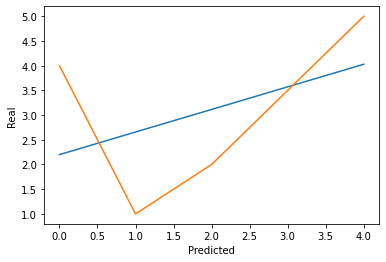

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje

hx = matmul(w, design_matrix.T)
print(hx)

mse = mean_squared_error(y, hx)
print(mse)
print('Mean squared error has a (1/n) multiplier therefore it is more realistic')

plt.plot(X, hx, label = 'Predicted')
plt.plot(X, y, label = 'Real')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje

#print(w)
#print(design_matrix)

#fi_inv = inv(design_matrix)
# Prints out that the last 2 dimensions of the array 
# must be square,
# indicating that the inverse of the design matrix cannot be found.
# That's because the design matrix isn't a sqaure matrix! 
# The pseudoinverse does not have such rigorous requirements
# and it can be calculated successfully.

fi_inverse = linalg.pinv(design_matrix)
print(fi_inverse)
print()

dm_new = PolynomialFeatures(3).fit_transform(X)
print(dm_new)
print()

# We have expanded the list of examples so it becomes a 4x4 square matrix
# and the regular inverse can now be calculated.
fi_inv2 = inv(dm_new)
print(fi_inv2)
print()

det_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(det_matrix)
print()
print(det(det_matrix)) # it is very close to 0, so we can approximate it to 0
print()
det_matrix_inv = inv(det_matrix)
print(det_matrix_inv) # this is actually numerically calculated, while giving 
# really small values, so it should not exist.
# this is to prove the point that the regular inverse cannot be calculated
# when the determinant is 0

[[ 0.6         0.4         0.2        -0.2       ]
 [-0.2        -0.08571429  0.02857143  0.25714286]]

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]

[[ 1.          0.          0.          0.        ]
 [-1.75        2.66666667 -1.          0.08333333]
 [ 0.875      -2.          1.25       -0.125     ]
 [-0.125       0.33333333 -0.25        0.04166667]]

[[1 2 3]
 [4 5 6]
 [7 8 9]]

6.66133814775094e-16

[[-4.50359963e+15  9.00719925e+15 -4.50359963e+15]
 [ 9.00719925e+15 -1.80143985e+16  9.00719925e+15]
 [-4.50359963e+15  9.00719925e+15 -4.50359963e+15]]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

regression = LinearRegression().fit(X, y)

prediction = regression.predict(X)
print(prediction)

prediction_error = mean_squared_error(prediction, y)

print(prediction_error)
print(mse)
# isti su

w_reg = [regression.intercept_, regression.coef_[0]]

print(w)
print(w_reg)
# isti 


[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143
2.042857142857143
[2.2        0.45714286]
[2.2, 0.45714285714285713]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return np.array([np.array([x + normal(0, noise**2)]) for x in np.nditer(f)])

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1, x2, N)])

In [10]:
# Vaš kôd ovdje
instances = make_instances(-5, 5, 50)


fx = np.array([np.array([5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3)])
              for x in np.nditer(instances)])

learning_set = make_labels(instances, fx, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

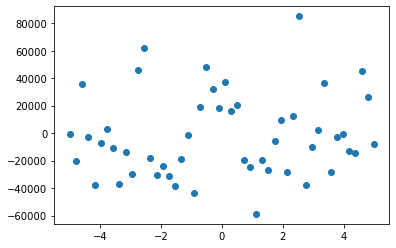

In [11]:
# Vaš kôd ovdje
scatter(instances, learning_set)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

884738543.8430493


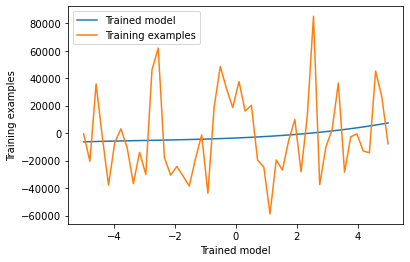

In [12]:
# Vaš kôd ovdje
design_matrix3 = PolynomialFeatures(3).fit_transform(instances)
w3 = matmul(linalg.pinv(design_matrix3), learning_set)
hx3 = matmul(design_matrix3, w3)

#design_matrix3 = PolynomialFeatures(3).fit_transform(instances)
#regression = LinearRegression().fit(instances, learning_set)
#prediction = regression.predict(instances)
#mse3 = mean_squared_error(prediction, instances)
#print(mse3)
#print(regre.predict(instances))
#print(w3)

mse3 = mean_squared_error(hx3, learning_set)
print(mse3)
#print(mean_squared_error(regre.predict(instances), learning_set))


plt.plot(instances, hx3, label = 'Trained model')
plt.xlabel('Trained model')
plt.plot(instances, learning_set, label = 'Training examples')
plt.ylabel('Training examples')
plt.legend()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

50
50
886458148.4360069
50
50
884738543.8430493
50
50
875305509.6745312
50
50
649021168.0358554
50
50
412113780.8520794


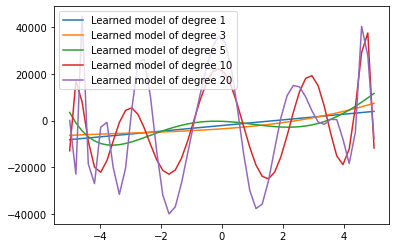

In [13]:
degrees = [1, 3, 5, 10, 20]
for d in degrees:
    design_matrix3a = PolynomialFeatures(d).fit_transform(instances)
    #w3a = matmul(linalg.pinv(design_matrix3a), learning_set)
    #hx3a = matmul(design_matrix3a, w3a);
    print(len(design_matrix3a))
    print(len(learning_set))
    regression = LinearRegression().fit(design_matrix3a, learning_set)
    prediction = regression.predict(design_matrix3a)
    plt.plot(instances, prediction, label = 'Learned model of degree ' + str(d))
    print(mean_squared_error(prediction, learning_set))
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

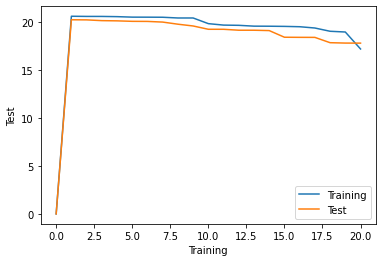

In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(instances, learning_set,
                                                    test_size = 0.5)
train_errors = [0 for i in range(21)]
test_errors = [0 for i in range(21)]
ranges = [i for i in range(21)]

degrees = [i for i in range(1, 21)]
for d in degrees:
    d_m_train = PolynomialFeatures(d).fit_transform(X_train)
    d_m_test = PolynomialFeatures(d).fit_transform(X_test)
    regression_train = LinearRegression().fit(d_m_train, y_train)
    regression_test = LinearRegression().fit(d_m_test, y_test)
    prediction_train = regression_train.predict(d_m_train)
    prediction_test = regression_test.predict(d_m_test)
    mse_train = mean_squared_error(prediction_train, y_train)
    mse_test = mean_squared_error(prediction_test, y_test)
    train_errors[d] = np.log(mse_train)
    test_errors[d] = np.log(mse_test)
    
plt.plot(ranges, train_errors, label = 'Training')
plt.xlabel('Training')
plt.plot(ranges, test_errors, label = 'Test')
plt.ylabel('Test')
plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

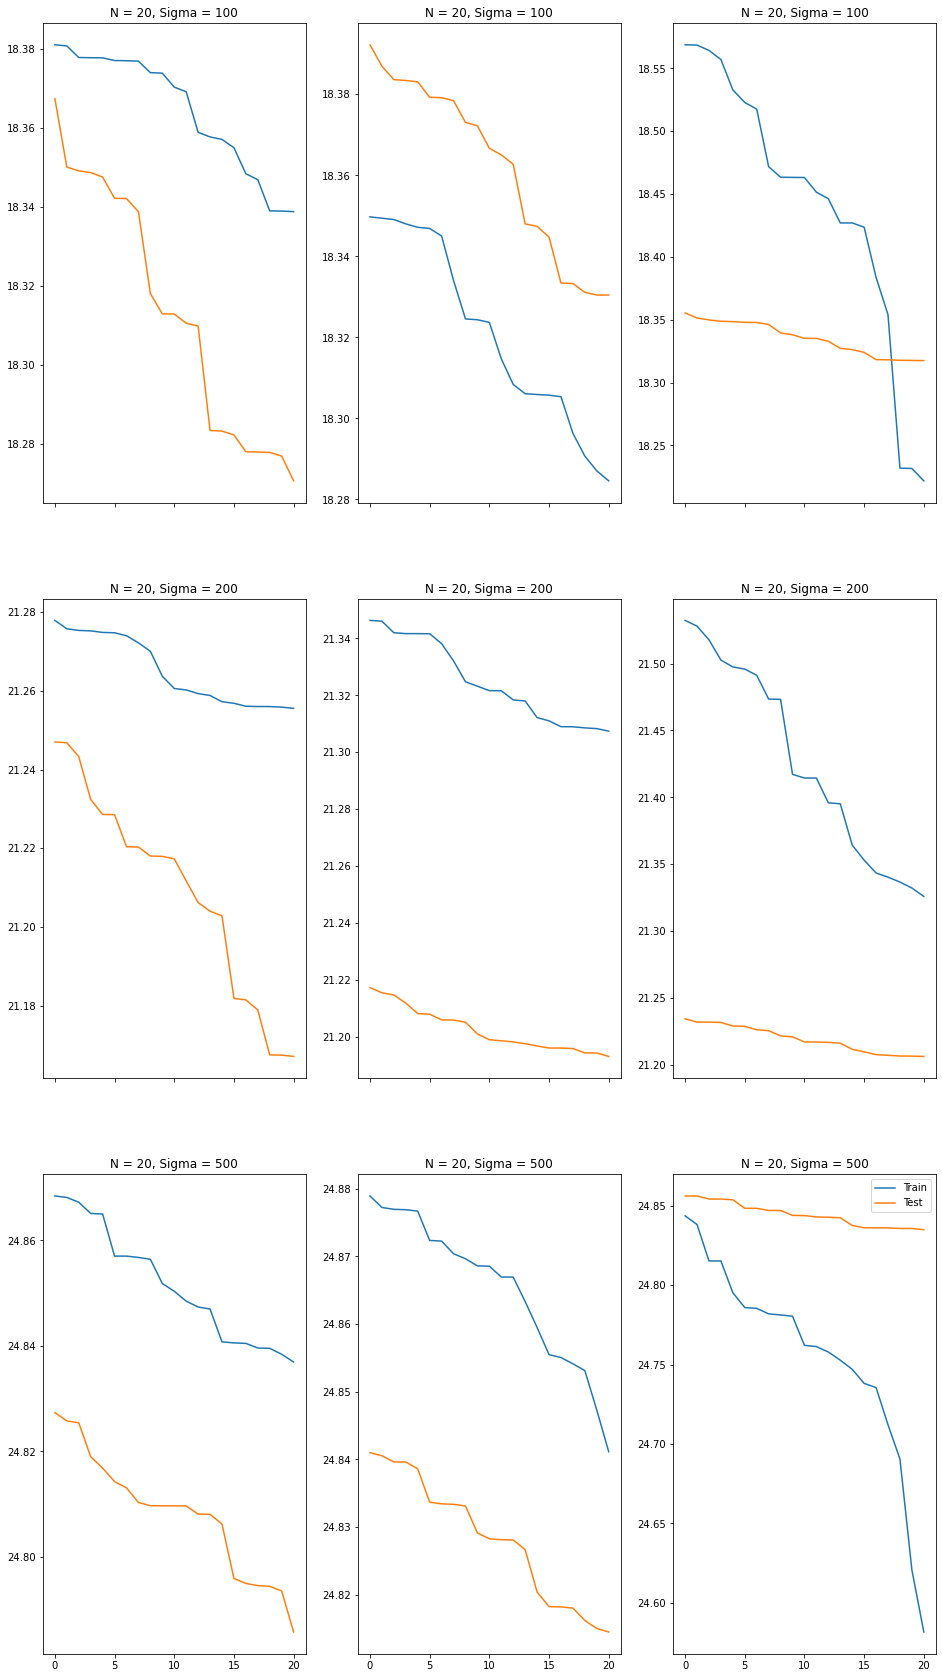

In [15]:
# Vaš kôd ovdje
fig, ax = plt.subplots(3, 3, figsize=(16, 30), sharex=True)

new_X = make_instances(-5, 5, 1000)
ranges = [i for i in range(21)]
degrees = [i for i in range(21)]
f = np.array([np.array([5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3)]) for x in np.nditer(new_X)])

noise_set = [100, 200, 500]
sizes = [0.33, 0.66, 0.9]
row = 0
for noise in noise_set:
    new_y = make_labels(new_X, f, noise)
    col = 0
    for size in sizes:
        train_error = [0 for i in range(21)]
        test_error = [0 for i in range(21)]
        X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=size)
        
        for d in degrees:
            d_m_train = PolynomialFeatures(d).fit_transform(X_train)
            d_m_test = PolynomialFeatures(d).fit_transform(X_test)
            reg_train = LinearRegression().fit(d_m_train, y_train)
            reg_test = LinearRegression().fit(d_m_test, y_test)
            pred_train = reg_train.predict(d_m_train)
            pred_test = reg_test.predict(d_m_test)
            mse_train = np.log(mean_squared_error(pred_train, y_train))
            mse_test = np.log(mean_squared_error(pred_test, y_test))
            train_error[d] = mse_train
            test_error[d] = mse_test
        
        #print(train_error)
        #print(test_error)
        ax[row][col].plot(ranges, train_error, label = 'Train')
        #ax[row][col].xlabel('train error')
        ax[row][col].plot(ranges, test_error, label = 'Test')
        #ax[row][col].ylabel('test error')
        ax[row][col].set_title("N = " + str(d) + ", Sigma = " + str(noise))
        col += 1
    row += 1
plt.legend()
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje
I = np.identity(4)
d = 3
factors = [0, 1, 10]
for f in factors:    
    d_m = PolynomialFeatures(d).fit_transform(X)
    dmTdm_fI = matmul(d_m.T, d_m) + f * I
    inv = linalg.inv(dmTdm_fI)
    penultimate = matmul(inv, d_m.T)
    final = matmul(penultimate, y)
    print(final)
    print()


[ 4.         -5.91666667  3.375      -0.45833333]

[ 1.79567372 -0.24729075 -0.0175289   0.07014758]

[0.43312265 0.11060671 0.13827839 0.03093411]



### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
d = 3
factors = [0, 1, 10]
for f in factors:
    d_m = PolynomialFeatures(d).fit_transform(X)
    ridge = Ridge(alpha=f).fit(d_m, y)
    print([ridge.intercept_,  ridge.coef_[1:]])

[3.999999999999943, array([-5.91666667,  3.375     , -0.45833333])]
[3.0569614512471643, array([-0.69079365, -0.2831746 ,  0.1445805 ])]
[2.4944418431229733, array([-0.15897295, -0.13423067,  0.0815601 ])]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

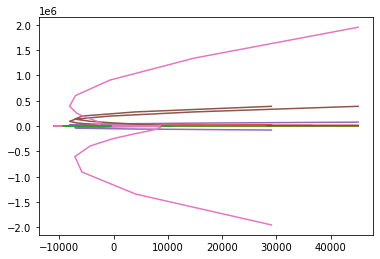

In [18]:
# Vaš kôd ovdje
from numpy.random import randint
instances = make_instances(-5, 5, 50)


fx = np.array([np.array([5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3)])
              for x in np.nditer(instances)])

learning_set = make_labels(instances, fx, 200)

n = 4
for i in range(n):
    a = randint(0, 100)
    d = randint(2, 10)
    d_m = PolynomialFeatures(d).fit_transform(instances)
    ridge = Ridge(alpha = a).fit(d_m, learning_set)
    prediction = ridge.predict(d_m)
    plt.plot(prediction, d_m)
plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


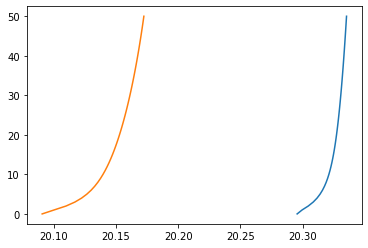

In [19]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(instances, learning_set,
                                                    test_size = 0.5)
d = 10
alphas = [i for i in range(51)]
train_error = [0 for i in range(51)]
test_error = [0 for i in range(51)]
#print(alphas)
for a in alphas:
    d_m_train = PolynomialFeatures(d).fit_transform(X_train)
    r_train = Ridge(alpha = a).fit(d_m_train, y_train)
    p_train = r_train.predict(d_m_train)
    mse_train = np.log(mean_squared_error(p_train, y_train))
    
    d_m_test = PolynomialFeatures(d).fit_transform(X_test)
    r_test = Ridge(alpha = a).fit(d_m_test, y_test)
    p_test = r_test.predict(d_m_test)
    mse_test = np.log(mean_squared_error(p_test, y_test))
    
    train_error[a] = mse_train
    test_error[a] = mse_test
    

#print(train_error)
#print(test_error)

#plt.plot(alphas, train_error, label = 'Train')
#plt.xlabel('Train')
#plt.plot(alphas, test_error, label = 'Test')
#plt.ylabel('Test')
#plt.show()

plt.plot(train_error, alphas, label = 'Train')
plt.plot(test_error, alphas)
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

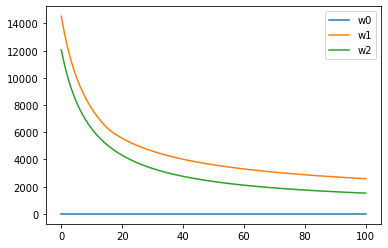

In [21]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(instances, learning_set,
                                                    test_size = 0.5)
d = 5
alphas = [i for i in range(101)]
norms = [0, 1, 2]

w0 = [0 for _ in range(101)]
w1 = [0 for _ in range(101)]
w2 = [0 for _ in range(101)]

for a in alphas:
    d_m = PolynomialFeatures(d).fit_transform(X_train)
    ridge = Ridge(alpha = a).fit(d_m, y_train)
    w0[a] = len(ridge.coef_) - nonzeroes(ridge.coef_.T)
    w1[a] = np.sum(abs(ridge.coef_))
    w2[a] = math.pow((matmul(ridge.coef_, ridge.coef_.T)), 0.5)
    
plt.plot(alphas, w0, label = 'w0')
plt.plot(alphas, w1, label = 'w1')
plt.plot(alphas, w2, label = 'w2')
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

<ipython-input-22-0601e41ca784>:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso = Lasso(alpha = a).fit(d_m, y_train)
C:\Users\Bobi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Bobi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13774116880.155323, tolerance: 2958739.8439454553
  model = cd_fast.enet_coordinate_descent(
C:\Users\Bobi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4944770378.916159, tolerance: 2958739.8439454553
  model

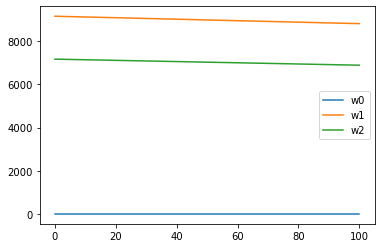

In [22]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(instances, learning_set,
                                                    test_size = 0.5)
d = 5
alphas = [i for i in range(101)]
norms = [0, 1, 2]

w0 = [0 for _ in range(101)]
w1 = [0 for _ in range(101)]
w2 = [0 for _ in range(101)]

for a in alphas:
    d_m = PolynomialFeatures(d).fit_transform(X_train)
    lasso = Lasso(alpha = a).fit(d_m, y_train)
    w0[a] = len(lasso.coef_) - nonzeroes(lasso.coef_.T)
    w1[a] = np.sum(abs(lasso.coef_))
    w2[a] = math.pow((matmul(lasso.coef_, lasso.coef_.T)), 0.5)
    
plt.plot(alphas, w0, label = 'w0')
plt.plot(alphas, w1, label = 'w1')
plt.plot(alphas, w2, label = 'w2')
plt.legend()
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

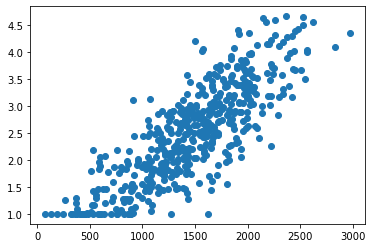

<function matplotlib.pyplot.show(close=None, block=None)>

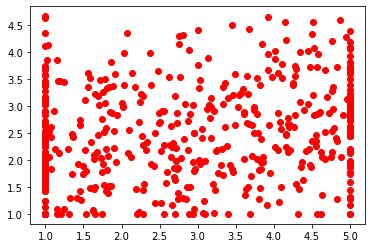

In [24]:
# Vaš kôd ovdje
plt.scatter(exam_score, grades_y)
plt.show()
plt.scatter(grade_in_highschool, grades_y, c = 'r')
plt.show

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje
ridge = Ridge(alpha = 0.01).fit(grades_X, grades_y)
print(ridge.intercept_, ridge.coef_)

0.15061179575776018 [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

2.4035406970078634 [ 0.          0.84313311  0.2185582   0.03520021 -0.03510285  0.05888781
 -0.03144964 -0.0296105  -0.01011842 -0.02879138]


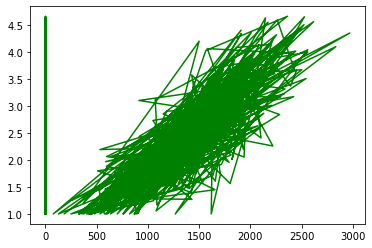

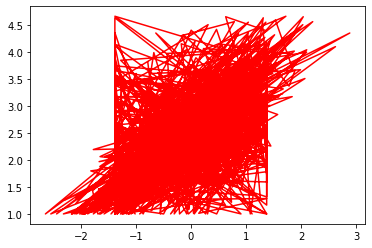

In [26]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
std_scaler = StandardScaler()

std_scaler.fit(grades_X, grades_y)
grades_X_fixed = std_scaler.transform(grades_X)
grades_y_fixed = grades_y
d_m = PolynomialFeatures(3).fit_transform(grades_X_fixed)

ridge.fit(d_m, grades_y_fixed)
print(ridge.intercept_, ridge.coef_)

plt.plot(grades_X, grades_y, c = 'g')
plt.show()
plt.plot(grades_X_fixed, grades_y, c = 'r')
plt.show()

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje

grades_X_fixed_colinear = np.append(grades_X_fixed,
                                    grades_X_fixed[:,1:2],
                                    axis = 1)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje
d_m = PolynomialFeatures(3).fit_transform(grades_X_fixed_colinear)
ridge = Ridge(alpha = 0.01).fit(d_m, grades_y_fixed)
prediction = ridge.predict(d_m)

print(ridge.intercept_, ridge.coef_)

2.4035389821262663 [ 0.          0.84313297  0.10929279  0.10929279  0.03520041 -0.0175519
 -0.0175519   0.01962965  0.01962965  0.01962965 -0.03144957 -0.01480608
 -0.01480608 -0.0033728  -0.0033728  -0.0033728  -0.0072016  -0.0072016
 -0.0072016  -0.0072016 ]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje
#print(len(grades_X_fixed_colinear))

#print(grades_X_fixed_colinear)

grades_X_sample = grades_X_fixed_colinear[250:500]
grades_y_sample = grades_y_fixed[100:350]

indexes = [i for i in range(500)]


for n in range(10):
    d_m = PolynomialFeatures(3).fit_transform(grades_X_sample)
    r1 = Ridge(alpha = 0.01).fit(d_m, grades_y_sample)
    r2 = Ridge(alpha = 1000).fit(d_m, grades_y_sample)
    
    print(r1.coef_)
    print(std(r1.coef_))
    print(r2.coef_)
    print(std(r2.coef_))
    

[ 0.         -0.20079675  0.02266555  0.02266555  0.10533885 -0.00607656
 -0.00607656 -0.00883973 -0.00883973 -0.00883973  0.07856103 -0.0115409
 -0.0115409   0.02877655  0.02877655  0.02877655 -0.00043266 -0.00043266
 -0.00043266 -0.00043266]
0.05547210695187427
[ 0.         -0.00274681  0.00180171  0.00180171  0.02582587  0.00399899
  0.00399899 -0.00311415 -0.00311415 -0.00311415  0.02324336  0.00502361
  0.00502361  0.00651932  0.00651932  0.00651932  0.00258008  0.00258008
  0.00258008  0.00258008]
0.007400256194188892
[ 0.         -0.20079675  0.02266555  0.02266555  0.10533885 -0.00607656
 -0.00607656 -0.00883973 -0.00883973 -0.00883973  0.07856103 -0.0115409
 -0.0115409   0.02877655  0.02877655  0.02877655 -0.00043266 -0.00043266
 -0.00043266 -0.00043266]
0.05547210695187427
[ 0.         -0.00274681  0.00180171  0.00180171  0.02582587  0.00399899
  0.00399899 -0.00311415 -0.00311415 -0.00311415  0.02324336  0.00502361
  0.00502361  0.00651932  0.00651932  0.00651932  0.00258008

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.